# Classification d'images par réseaux de neurones profonds

In [2]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 16s 0us/step


In [44]:
from keras.applications.vgg16 import decode_predictions

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Faire une prédiction

In [8]:
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np


In [63]:
img = load_img('cougar.jpg', target_size=(224, 224))
img = img_to_array(img)

In [64]:
img.shape

(224, 224, 3)

In [65]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [66]:
img = preprocess_input(img)
img.shape

(1, 224, 224, 3)

In [67]:
type(img)

numpy.ndarray

In [68]:
y = model.predict(img)
label = decode_predictions(y)
label

[[('n02125311', 'cougar', 0.9887279),
  ('n02129165', 'lion', 0.01065297),
  ('n02127052', 'lynx', 0.0006036613),
  ('n02128925', 'jaguar', 7.781835e-06),
  ('n02129604', 'tiger', 2.3863622e-06)]]

In [58]:
def treat_img(path):
    img = load_img(path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

## fc2
dernière couche du réseau de neurones sert à prédire la classe de l'image. Les couches intermédiaires font parti d'extraction de caractéritiques. Pour récuérer la représentation de l'image sur l'avant dernière couche fc2

In [48]:
from keras.models import Model

In [60]:
model_feat = Model(inputs = model.input, outputs = model.get_layer('fc2').output)


## Trouver les images proches par Réseaux de neurones

In [87]:
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from skimage.io import imread

In [71]:
descr_hist = np.zeros((300, 4096))
for i in range(300):
    im = treat_img(f'images/{i:03d}.jpg')
    descr_hist[i:] = model_feat.predict(im)

In [78]:
descr_hist.shape

(300, 4096)

In [100]:
def find_close_images(image_path, descr_hist):
    im = treat_img(image_path)
    im = model_feat.predict(im)
    d = distance_matrix(im, descr_hist)
    d_i = np.argsort(d[0, :])
    plt.clf()
    for j in range(9):
        plt.subplot(3, 3, j+1)
        plt.imshow(imread(f'images/{d_i[j]:03d}.jpg'))

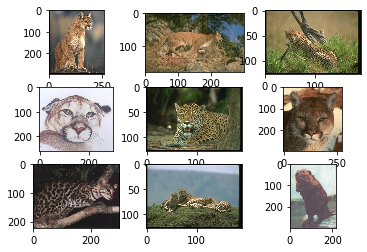

In [101]:
find_close_images("cougar.jpg", descr_hist)